In [1]:
import csv
from textblob import TextBlob
import os
import pandas as pd
from textblob.sentiments import NaiveBayesAnalyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk .corpus import stopwords
import string
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import PorterStemmer

In [2]:
# Set working directory
os.chdir('C:/Users/annup/Desktop/Edwisor/')

In [3]:
# Load text data
post = pd.read_csv('Post.csv')

In [4]:
post.head()

Id                                               Post
0   1                          cumin seed) and Hepatitis
1   2   iron overload  chelation  diabetes and hepatitis
2   3                                    please help me.
3   4                        two different test results!
4   5                    miscarriage and devastation..!!

In [5]:
post.describe()

Id
count  28718.000000
mean   14359.500000
std     8290.316852
min        1.000000
25%     7180.250000
50%    14359.500000
75%    21538.750000
max    28718.000000

In [6]:
post.shape

(28718, 2)

In [7]:
# Select few text
post = post.iloc[:1000,]

In [8]:
post.head()

Id                                               Post
0   1                          cumin seed) and Hepatitis
1   2   iron overload  chelation  diabetes and hepatitis
2   3                                    please help me.
3   4                        two different test results!
4   5                    miscarriage and devastation..!!

In [9]:
# Download repository
#nltk.download()

In [10]:
# Extract stop words
stop = set(stopwords.words('english'))
# Extract punctuation marks
exclude = set(string.punctuation)

In [11]:
stop

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [12]:
exclude

{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~'}

In [13]:
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = "".join(i for i in stop_free if i not in exclude)
    num_free = "".join(i for i in punc_free if not i.isdigit())
    return num_free

post_corpus = [clean(post.iloc[i,1]) for i in range(0, post.shape[0])]

In [14]:
post.iloc[14]

Id                                15
Post     then 9.4  then 7.2  NOW 6.2
Name: 14, dtype: object

In [15]:
post_corpus[0]

'cumin seed hepatitis'

In [16]:
import re
corpus = []
for i in range(0, 1000):
    post_corpus1 = re.sub(r'\W', ' ', str(post.iloc[i,1]))
    post_corpus1 = post_corpus1.lower()
    post_corpus1 = re.sub(r'^br$', ' ', post_corpus1)
    post_corpus1 = re.sub(r'\s+br\s+',' ',post_corpus1)
    post_corpus1 = re.sub(r'\s+[a-z]\s+', ' ',post_corpus1)
    post_corpus1 = re.sub(r'^b\s+', '', post_corpus1)
    post_corpus1 = re.sub(r'\s+', ' ', post_corpus1)
    post_corpus1 = "".join(i for i in post_corpus1 if not i.isdigit())
    corpus.append(post_corpus1)  

In [17]:
post.iloc[14]

Id                                15
Post     then 9.4  then 7.2  NOW 6.2
Name: 14, dtype: object

In [18]:
corpus[14]

' then   then   now  '

In [19]:
# create term document matrix
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
import textmining

In [21]:
# Create dtm
tdm = textmining.TermDocumentMatrix()

for i in post_corpus:
    print(i)
    tdm.add_doc(i)

cumin seed hepatitis
iron overload chelation diabetes hepatitis
please help me
two different test results
miscarriage devastation
heart dysfunction tied thalassemia take vitamin please
arthritis fibromyalgia
exjade
please help
good news yeah guess 
liver 
im new forum
pushing kidney
problems growth problems
  
kelfer desferal
question
help me im suffering worse fatigue dizzy
anyone tried heard
guidance please
trait carrier
need advise
need help
common this
blank
minors also affected
antacids drug interactions
blood test iron cbc liver adding up
hb levels closer intermedia
cirhosis liver tumor
recommended 
hon mr ted chudleigh
today hb 
bone marrow transplantation centre
supplements health
take iron not
fatigue iron levels
 kg
iron dropping  help
treat 
eugenio lamesa
pregnant hypothyroidismfeed back appreciated
kelfer treatment pkan successful oakland
heart failure
suggestions anything
ferritin around  safe
that
starchconjugating deferoxamine sdfo
desferal l combination
etc
jadenu appr

In [22]:
# write tdm into data frame
for row in tdm.rows(cutoff=1):
    a = print(row)
    a

['cumin', 'seed', 'hepatitis', 'iron', 'overload', 'chelation', 'diabetes', 'please', 'help', 'me', 'two', 'different', 'test', 'results', 'miscarriage', 'devastation', 'heart', 'dysfunction', 'tied', 'thalassemia', 'take', 'vitamin', 'arthritis', 'fibromyalgia', 'exjade', 'good', 'news', 'yeah', 'guess', 'liver', 'im', 'new', 'forum', 'pushing', 'kidney', 'problems', 'growth', 'kelfer', 'desferal', 'question', 'suffering', 'worse', 'fatigue', 'dizzy', 'anyone', 'tried', 'heard', 'guidance', 'trait', 'carrier', 'need', 'advise', 'common', 'this', 'blank', 'minors', 'also', 'affected', 'antacids', 'drug', 'interactions', 'blood', 'cbc', 'adding', 'up', 'hb', 'levels', 'closer', 'intermedia', 'cirhosis', 'tumor', 'recommended', 'hon', 'mr', 'ted', 'chudleigh', 'today', 'bone', 'marrow', 'transplantation', 'centre', 'supplements', 'health', 'not', 'kg', 'dropping', 'treat', 'eugenio', 'lamesa', 'pregnant', 'hypothyroidismfeed', 'back', 'appreciated', 'treatment', 'pkan', 'successful', 'oa

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [23]:
count_vec = CountVectorizer(stop_words=stopwords.words('english'),lowercase=True)

In [24]:
dtm = pd.DataFrame(count_vec.fit_transform(post_corpus).toarray(),columns=count_vec.get_feature_names(),index=None)

In [25]:
count_vec.fit(post_corpus)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [26]:
print(count_vec.vocabulary_)

{'cumin': 1479, 'seed': 5687, 'hepatitis': 2944, 'iron': 3447, 'overload': 4587, 'chelation': 1024, 'diabetes': 1731, 'please': 4851, 'help': 2903, 'two': 6737, 'different': 1761, 'test': 6350, 'results': 5480, 'miscarriage': 4141, 'devastation': 1718, 'heart': 2882, 'dysfunction': 1951, 'tied': 6524, 'thalassemia': 6376, 'take': 6284, 'vitamin': 6987, 'arthritis': 422, 'fibromyalgia': 2410, 'exjade': 2211, 'good': 2699, 'news': 4335, 'yeah': 7232, 'guess': 2756, 'liver': 3784, 'im': 3199, 'new': 4330, 'forum': 2523, 'pushing': 5157, 'kidney': 3576, 'problems': 5047, 'growth': 2752, 'kelfer': 3562, 'desferal': 1676, 'question': 5177, 'suffering': 6154, 'worse': 7195, 'fatigue': 2337, 'dizzy': 1839, 'anyone': 340, 'tried': 6696, 'heard': 2880, 'guidance': 2759, 'trait': 6626, 'carrier': 931, 'need': 4310, 'advise': 126, 'common': 1199, 'blank': 702, 'minors': 4131, 'also': 220, 'affected': 134, 'antacids': 314, 'drug': 1929, 'interactions': 3389, 'blood': 718, 'cbc': 962, 'adding': 89, 

In [27]:
vector = count_vec.transform(post_corpus)

In [28]:
print ('Amount of Non-Zero occurences: ', vector.nnz)

Amount of Non-Zero occurences:  28062


In [29]:
print ('Shape of Sparse Matrix: ', vector.shape)
print ('Amount of Non-Zero occurences: ', vector.nnz)
print ('sparsity: %.2f%%' % (100.0 * vector.nnz /
                             (vector.shape[0] * vector.shape[1])))

Shape of Sparse Matrix:  (1000, 7287)
Amount of Non-Zero occurences:  28062
sparsity: 0.39%


In [30]:
print(vector.shape)
print(type(vector))
print(vector.toarray())

(1000, 7287)
<class 'scipy.sparse.csr.csr_matrix'>
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [31]:
tdm.doc_count

{'cumin': 2,
 'seed': 1,
 'hepatitis': 5,
 'iron': 109,
 'overload': 21,
 'chelation': 53,
 'diabetes': 9,
 'please': 57,
 'help': 68,
 'me': 16,
 'two': 49,
 'different': 25,
 'test': 54,
 'results': 55,
 'miscarriage': 1,
 'devastation': 1,
 'heart': 38,
 'dysfunction': 3,
 'tied': 2,
 'thalassemia': 66,
 'take': 123,
 'vitamin': 49,
 'arthritis': 3,
 'fibromyalgia': 1,
 'exjade': 78,
 'good': 126,
 'news': 46,
 'yeah': 11,
 'guess': 10,
 'liver': 33,
 'im': 40,
 'new': 50,
 'forum': 15,
 'pushing': 4,
 'kidney': 11,
 'problems': 27,
 'growth': 11,
 'kelfer': 10,
 'desferal': 59,
 'question': 24,
 'suffering': 5,
 'worse': 4,
 'fatigue': 4,
 'dizzy': 2,
 'anyone': 22,
 'tried': 13,
 'heard': 19,
 'guidance': 2,
 'trait': 10,
 'carrier': 10,
 'need': 63,
 'advise': 12,
 'common': 20,
 'this': 15,
 'blank': 1,
 'minors': 22,
 'also': 145,
 'affected': 9,
 'antacids': 1,
 'drug': 29,
 'interactions': 1,
 'blood': 120,
 'cbc': 7,
 'adding': 2,
 'up': 10,
 'hb': 78,
 'levels': 60,
 'close

In [32]:
dtm

aa  aabha  aaron  aback  abbreviated  abdel  abdominal  abdulwahab  abhi  \
0     0      0      0      0            0      0          0           0     0   
1     0      0      0      0            0      0          0           0     0   
2     0      0      0      0            0      0          0           0     0   
3     0      0      0      0            0      0          0           0     0   
4     0      0      0      0            0      0          0           0     0   
5     0      0      0      0            0      0          0           0     0   
6     0      0      0      0            0      0          0           0     0   
7     0      0      0      0            0      0          0           0     0   
8     0      0      0      0            0      0          0           0     0   
9     0      0      0      0            0      0          0           0     0   
10    0      0      0      0            0      0          0           0     0   
11    0      0      0      0            0      0          0           0     0   
12    0      0      0      0            0      0          0           0     0   
13    0      0      0      0            0      0          0           0     0   
14    0      0      0      0            0      0          0           0     0   
15    0      0      0      0            0      0          0           0     0   
16    0      0      0      0            0      0          0           0     0   
17    0      0      0      0            0      0          0           0     0   
18    0      0      0      0            0      0          0           0     0   
19    0      0      0      0            0      0          0           0     0   
20    0      0      0      0            0      0          0           0     0   
21    0      0      0      0            0      0          0           0     0   
22    0      0      0      0            0      0          0           0     0   
23    0      0      0      0            0      0          0           0     0   
24    0      0      0      0            0      0          0           0     0   
25    0      0      0      0            0      0          0           0     0   
26    0      0      0      0            0      0          0           0     0   
27    0      0      0      0            0      0          0           0     0   
28    0      0      0      0            0      0          0           0     0   
29    0      0      0      0            0      0          0           0     0   
..   ..    ...    ...    ...          ...    ...        ...         ...   ...   
970   0      0      0      0            0      0          0           0     0   
971   0      0      0      0            0      0          0           0     0   
972   0      0      0      0            0      0          0           0     0   
973   0      0      0      0            0      0          0           0     0   
974   0      0      0      0            0      0          0           0     0   
975   0      0      0      0            0      0          0           0     0   
976   0      0      0      0            0      0          0           0     0   
977   0      0      0      0            0      0          0           0     0   
978   0      0      0      0            0      0          0           0     0   
979   0      0      0      0            0      0          0           0     0   
980   0      0      0      0            0      0          0           0     0   
981   0      0      0      0            0      0          0           0     0   
982   0      0      0      0            0      0          0           0     0   
983   0      0      0      0            0      0          0           0     0   
984   0      0      0      0            0      0          0           0     0   
985   0      0      0      0            0      0          0           0     0   
986   0      0      0      0            0      0          0           0     0   
987   0      0      0      0        

In [33]:
dtm.shape

(1000, 7287)

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

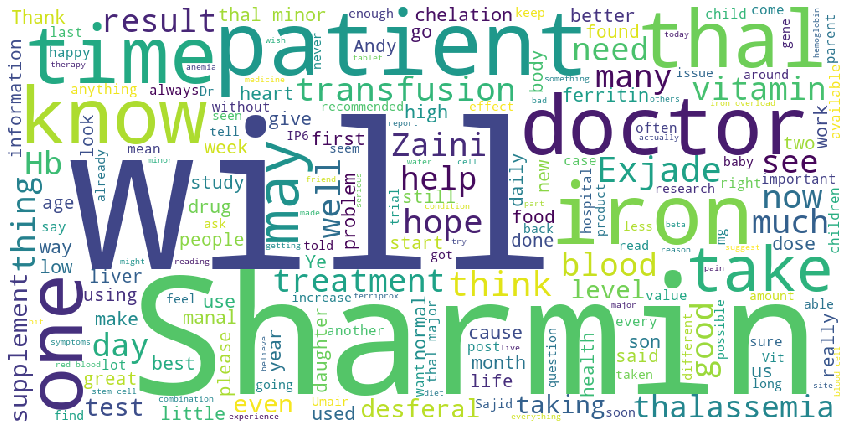

In [35]:
# word cloud
word_cloud = WordCloud(width=1000,height=500,stopwords=STOPWORDS,background_color='white').generate(' '.join(post['Post']))
plt.figure(figsize=(15,8))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

In [36]:
post_corpus

['cumin seed hepatitis',
 'iron overload chelation diabetes hepatitis',
 'please help me',
 'two different test results',
 'miscarriage devastation',
 'heart dysfunction tied thalassemia take vitamin please',
 'arthritis fibromyalgia',
 'exjade',
 'please help',
 'good news yeah guess ',
 'liver ',
 'im new forum',
 'pushing kidney',
 'problems growth problems',
 '  ',
 'kelfer desferal',
 'question',
 'help me im suffering worse fatigue dizzy',
 'anyone tried heard',
 'guidance please',
 'trait carrier',
 'need advise',
 'need help',
 'common this',
 'blank',
 'minors also affected',
 'antacids drug interactions',
 'blood test iron cbc liver adding up',
 'hb levels closer intermedia',
 'cirhosis liver tumor',
 'recommended ',
 'hon mr ted chudleigh',
 'today hb ',
 'bone marrow transplantation centre',
 'supplements health',
 'take iron not',
 'fatigue iron levels',
 ' kg',
 'iron dropping  help',
 'treat ',
 'eugenio lamesa',
 'pregnant hypothyroidismfeed back appreciated',
 'kelfer 

In [37]:
post1 = pd.DataFrame(data=post_corpus,columns=['Post'])

In [38]:
post1.shape

(1000, 1)

In [39]:
post1.head()

Post
0                        cumin seed hepatitis
1  iron overload chelation diabetes hepatitis
2                              please help me
3                  two different test results
4                     miscarriage devastation

In [40]:
post1['Id'] = post['Id']

In [41]:
post1.head()

Post  Id
0                        cumin seed hepatitis   1
1  iron overload chelation diabetes hepatitis   2
2                              please help me   3
3                  two different test results   4
4                     miscarriage devastation   5

In [42]:
post1 = post1[['Id','Post']]

In [43]:
post1.head()

Id                                        Post
0   1                        cumin seed hepatitis
1   2  iron overload chelation diabetes hepatitis
2   3                              please help me
3   4                  two different test results
4   5                     miscarriage devastation

In [44]:
post.head()

Id                                               Post
0   1                          cumin seed) and Hepatitis
1   2   iron overload  chelation  diabetes and hepatitis
2   3                                    please help me.
3   4                        two different test results!
4   5                    miscarriage and devastation..!!

In [45]:
post.shape[0]

1000

In [46]:
# Sentiment analysis
# create empty dataframe to store results
FinalResults = pd.DataFrame()

# Run engine
for i in range(0,post1.shape[0]):
    blob = TextBlob(post1.iloc[i,1])
    temp = pd.DataFrame({'comments': post1.iloc[i,1],'Polarity': blob.sentiment.polarity},index=[0])
    FinalResults = FinalResults.append(temp)

In [47]:
FinalResults.head()

Polarity                                    comments
0       0.0                        cumin seed hepatitis
0       0.0  iron overload chelation diabetes hepatitis
0       0.0                              please help me
0       0.0                  two different test results
0       0.0                     miscarriage devastation

In [48]:
FinalResults = FinalResults[['comments','Polarity']]

In [49]:
FinalResults.head(50)

comments  Polarity
0                               cumin seed hepatitis  0.000000
0         iron overload chelation diabetes hepatitis  0.000000
0                                     please help me  0.000000
0                         two different test results  0.000000
0                            miscarriage devastation  0.000000
0  heart dysfunction tied thalassemia take vitami...  0.000000
0                             arthritis fibromyalgia  0.000000
0                                             exjade  0.000000
0                                        please help  0.000000
0                              good news yeah guess   0.700000
0                                             liver   0.000000
0                                       im new forum  0.136364
0                                     pushing kidney  0.000000
0                           problems growth problems  0.000000
0                                                     0.000000
0                                    kelfer desferal  0.000000
0                                           question  0.000000
0           help me im suffering worse fatigue dizzy -0.400000
0                                 anyone tried heard  0.000000
0                                    guidance please  0.000000
0                                      trait carrier  0.000000
0                                        need advise  0.000000
0                                          need help  0.000000
0                                        common this -0.300000
0                                              blank  0.000000
0                               minors also affected  0.000000
0                         antacids drug interactions  0.000000
0                blood test iron cbc liver adding up  0.000000
0                        hb levels closer intermedia  0.000000
0                               cirhosis liver tumor  0.000000
0                                       recommended   0.000000
0                               hon mr ted chudleigh  0.000000
0                                          today hb   0.000000
0                 bone marrow transplantation centre  0.000000
0                                 supplements health  0.000000
0                                      take iron not  0.000000
0                                fatigue iron levels  0.000000
0                                                 kg  0.000000
0                                iron dropping  help  0.000000
0                                             treat   0.000000
0                                     eugenio lamesa  0.000000
0       pregnant hypothyroidismfeed back appreciated  0.177778
0           kelfer treatment pkan successful oakland  0.750000
0                                      heart failure -0.316667
0                               suggestions anything  0.000000
0                              ferritin around  safe  0.500000
0                                               that  0.000000
0                starchconjugating deferoxamine sdfo  0.000000
0                             desferal l combination  0.000000
0                                                etc  0.000000

In [50]:
FinalResults['Polarity'].describe()

count    1000.000000
mean        0.153864
std         0.237875
min        -0.666667
25%         0.000000
50%         0.100000
75%         0.270486
max         1.000000
Name: Polarity, dtype: float64

In [51]:
FinalResults.head(20)

comments  Polarity
0                               cumin seed hepatitis  0.000000
0         iron overload chelation diabetes hepatitis  0.000000
0                                     please help me  0.000000
0                         two different test results  0.000000
0                            miscarriage devastation  0.000000
0  heart dysfunction tied thalassemia take vitami...  0.000000
0                             arthritis fibromyalgia  0.000000
0                                             exjade  0.000000
0                                        please help  0.000000
0                              good news yeah guess   0.700000
0                                             liver   0.000000
0                                       im new forum  0.136364
0                                     pushing kidney  0.000000
0                           problems growth problems  0.000000
0                                                     0.000000
0                                    kelfer desferal  0.000000
0                                           question  0.000000
0           help me im suffering worse fatigue dizzy -0.400000
0                                 anyone tried heard  0.000000
0                                    guidance please  0.000000

In [52]:
# Sentiment analysis using vader
FinalResults_vader = pd.DataFrame()
# Create engine
analyzer = SentimentIntensityAnalyzer()
# Run engine
for i in range(0,post1.shape[0]):
    #print(i)
    snt = analyzer.polarity_scores(post1.iloc[i,1])
    temp = pd.DataFrame({'Comments':post1.iloc[i,1]},index=[0])
    temp['Polarity'] = snt.items()[3][1]
    FinalResults_vader = FinalResults_vader.append(temp)

TypeError: 'dict_items' object does not support indexing

In [ ]:
FinalResults_vader.head(20)